We successfully wrote a program for solving sudoku....Even though it is iterative(upto decision making) and backtracking(bruteforce with backtracking) from decision making onwards.....

Expert Example :
0 8 0 0 0 0 0 9 0
0 7 5 3 6 0 0 0 8
0 0 0 0 4 0 0 0 0
6 5 0 0 0 2 3 0 0
0 0 0 4 5 0 0 0 0
2 0 9 0 0 0 0 0 0
0 0 0 0 0 7 5 0 0
0 0 0 0 1 3 6 0 0
1 0 0 0 0 0 0 2 0 

In [27]:
# The only library we need to know before writing this code is numpy library
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# # give your input in one line(i.e., in oneline give the 81 numbers space seperated), give 0's for the empty spaces in the sudoku and then press Enter
# # eg:easy sudoku : 0 3 4 8 7 0 0 0 0 0 0 2 3 4 0 1 5 8 1 8 0 2 0 0 0 0 0 9 0 0 0 3 0 5 0 6 0 1 0 0 0 0 4 0 0 0 5 3 7 6 0 0 0 2 0 2 0 6 0 3 0 0 0 7 0 8 0 0 5 0 0 3 3 0 1 4 0 7 8 6 5
# arr=list(map(int,input().split(" ")))
# arr_bf=arr # This arr_bf is used by brute force sudoku solver 
# print(len(arr))

In [29]:
class TimerError(Exception):
    """A custom exception used to report errors in use of Timer class"""
class Timer():
    def __init__(self):
        self._start_time=None # Underscore indicates that users of Timer class should not modify it
    def Start(self):
        if self._start_time is not None:
            raise TimerError(f"The Timer is currently running, use Stop() to stop")
        self._start_time=time.perf_counter()
    def Stop(self):
        if self._start_time is None:
            raise TimerError(f"The Timer is not yet started, use Start() to start")
        Elapsed_time=time.perf_counter()-self._start_time
        self._start_time=None
        print(f"Elapsed time is :{Elapsed_time:0.5f} seconds")
        return (Elapsed_time)

In [30]:
t=Timer()

In [31]:
set1={0,1,2}
set2={3,4,5}
set3={6,7,8}
def get_a(i):
    if(i in set1):
        a=0
    elif(i in set2):
        a=3
    elif(i in set3):
        a=6
    return a
def get_b(j):
    if(j in set1):
        b=0
    elif(j in set2):
        b=1
    elif(j in set3):
        b=2
    return b
def get_box_index(i,j):
    
    a=get_a(i)
    b=get_b(j)
    return a+b
    
    
def create_sets(arr,n,nine_set):
    # create_sets create different sets like sets_matrix(n*n board where each element is a set containing what are the choices we have at that place)
    # rows is a 9 element list where each is a set which contains all the elements present in that rows
    # cols is a 9 element list where each is a set which contains all the elements present in that cols
    # boxes is a 9 element list where each is a set which contains all the elements present in that box(we have 9 boxes in a sudoku)
    sets=[set() for i in range(n*n)]
    sets_matrix=np.array(sets).reshape(n,n)
    rows=[set() for i in range(n)]
    cols=[set() for i in range(n)]
    boxes=[set() for i in range(n)]
    for i in range(n):
        for j in range(n):
            if(arr[i][j] != 0):
                rows[i].add(arr[i][j])
                cols[j].add(arr[i][j])
                boxes[get_box_index(i,j)].add(arr[i][j]) #get_box_index takes the i,j indices and returns the box number(0-8)
    for i in range(n):
        for j in range(n):
            if(arr[i][j] == 0):
                sets_matrix[i][j]=sets_matrix[i][j].union(nine_set.difference(boxes[get_box_index(i,j)].union(rows[i].union(cols[j]))))
    return sets_matrix,rows,cols,boxes
                
def unique_check(i,j,sets_matrix):
    # This function checks whether there is only one choice at a place (eg: {3} at a place in sets_matrix means 
    # 3 is the only choice at that place so we will place 3 at that place)
    if(len(sets_matrix[i][j])==1):
        return True
    return False
def horizontal_unique_check(i,j,n,sets_matrix):
    # For a given place (i,j) this function checks whether there is any element in that place which can only occur
    # in that place(in sets_matrix) and not occured in any other place(in sets_matrix) horizontally 
    temp=sets_matrix[i][j].copy()
    for k in range(n):
        if(k!=j):
            temp=temp.difference(sets_matrix[i][k])
    if(len(temp)==1):
        for x in temp:
            return True,x
    return False,0
def vertical_unique_check(i,j,n,sets_matrix):
    # For a given place (i,j) this function checks whether there is any element in that place which can only occur
    # in that place(in sets_matrix) and not occured in any other place(in sets_matrix) vertically
    temp=sets_matrix[i][j].copy()
    for k in range(n):
        if(k!=i):
            temp=temp.difference(sets_matrix[k][j])
    if(len(temp)==1):
        for x in temp:
            return True,x
    return False,0
def box_unique_check(i,j,n,sets_matrix):
    # For a given place (i,j) this function checks whether there is any element in that place which can only occur
    # in that place(in sets_matrix) and not occured in any other place(in sets_matrix) in that box which (i,j) belongs to
    temp=sets_matrix[i][j].copy()
    for p in range(get_a(i),get_a(i)+3):
        for q in range(get_b(j)*3,get_b(j)*3+3):
            if(p!=i or q!=j):
                temp=temp.difference(sets_matrix[p][q])
    if(len(temp)==1):
        for x in temp:
            return True,x
    return False,0      
def check_isover(arr,n):
    # Return True if game over else False 
    over=True
    for i in range(n):
        for j in range(n):
            if(arr[i][j]==0):
                over=False
    return over
def no_of_choices_for_each_element(sets_matrix,n):
    n_sets_matrix=[]
    for i in range(n):
        for j in range(n):
            if(len(sets_matrix[i][j])==0):
                n_sets_matrix.append(9)
            else:
                n_sets_matrix.append(len(sets_matrix[i][j]))
    n_sets_matrix=np.array(n_sets_matrix).reshape(n,n)
    return n_sets_matrix
def get_indices(flat,n):
    # for a flat index in a matrix it gives the (i,j) values 
    for j in range(0,n):
        if((flat-j)%n==0):
            q=j
            break
    p=(flat-j)/n
    return int(p),q
def hv_mistake_test(arr,n):
    # It checks whether there is any clash horizontally or there is any clash vertically
    # (i.e same element occurs at 2 places in the same row or same col) 
    for i in range(n):
        h=[]
        v=[]
        for j in range(n):
            if(arr[i][j]!=0 ):
                if(arr[i][j] not in h):
                    h.append(arr[i][j])
                else:
                    return True
            if(arr[j][i]!=0):
                if(arr[j][i] not in v):
                    v.append(arr[j][i])
                else:
                    return True
    #print("I'm in hv and returning false")
    return False
def box_mistake_test(arr):
    # It checks whether there is a clash in any box
    # (i.e same element occurs at 2 places in the same box) 
    for i in [0,3,6]:
        for j in [0,3,6]:
            b=[]
            for p in range(i,i+3):
                for q in range(j,j+3):
                    if(arr[p][q]!=0):
                        if(arr[p][q] not in b):
                            b.append(arr[p][q])
                        else:
                            return True
    return False
                    
            
def mistake_test(arr,n):
    # return true if there is a mistake else false
    if(hv_mistake_test(arr,n) or box_mistake_test(arr)):
        return True
    return False
        
def isall_nines(n_sets_matrix,n):
    # this is used because some times at some point during recursion at some places the element it is not filled(indicated with 0)
    # and also have no choices to make(sets_matrix at the place is empty)
    # so in order to address this issue we wrote this function the purpose of this function is 
    # "since i am calling this function after checking the game is over that means the game is not over and n_sets_matrix denotes 
    # the number of choices at a place(if the place is filled we denote it with 9 in n_sets_matrix(serves for the purpose of argmin 
    # for reducing the breadth of the decision tree(during recursion))) so all places should not be 9's...
    # if all places are 9's there is some errorr so we traceback
    for i in range(n):
        for j in range(n):
            if(n_sets_matrix[i][j]!=9):
                return False
    return True
                
    
def recursive_backtracking_approach(arr,sets_matrix,n,nine_set,n_sets_matrix):
    if(mistake_test(arr,n)):
        return arr,False
    elif(check_isover(arr,n)):
        print("SUDOKU COMPLETED")
        print(arr)
        return arr,True
    elif(isall_nines(n_sets_matrix,n)):
        return arr,False
    else:
        arr_copy=arr.copy()
        flat=np.argmin(n_sets_matrix)
        p,q=get_indices(flat,n)
        #print(p,q)
        arr_copy[p][q]=list(sets_matrix[p][q])[0]
        sets_matrix_copy,_,_,_=create_sets(arr_copy,n,nine_set)
        n_sets_matrix_copy=no_of_choices_for_each_element(sets_matrix_copy,n)
        call=0
        while(not recursive_backtracking_approach(arr_copy,sets_matrix_copy,n,nine_set,n_sets_matrix_copy)[1]):
            call+=1
            if(call==len(sets_matrix[p][q])):
                return arr,False
            arr_copy[p][q]=list(sets_matrix[p][q])[call%len(sets_matrix[p][q])]
            sets_matrix_copy,_,_,_=create_sets(arr_copy,n,nine_set)
            n_sets_matrix_copy=no_of_choices_for_each_element(sets_matrix_copy,n)
        return arr,True
        
        
def play_real_sudoku(arr,sets_matrix,rows,cols,boxes,n,nine_set):
    n_sets_matrix=no_of_choices_for_each_element(sets_matrix,n) 
    return recursive_backtracking_approach(arr,sets_matrix,n,nine_set,n_sets_matrix)[0]
    
    
    
    
    

            
    

In [32]:
def initial_push(arr,sets_matrix,rows,cols,boxes,n,nine_set):
    # This function can solve the problems which don't require decisions 
    # (even for the problems which require decisions this will solve till a dicision is required)
    # This will reduce the depth and breadth of the decision tree  
        while(True):
        #     sets_matrix,rows,cols,boxes=create_sets(arr,n,nine_set)
        #     print(sets_matrix)
        #     print(rows)
        #     print(cols)
        #     print(boxes)
        #     print(arr)
            flag=0
            for i in range(n):
                for j in range(n):
                    if(arr[i][j]==0):
                        #print("We are solving for ({i},{j})",i,j)
                        bh,xh=horizontal_unique_check(i,j,n,sets_matrix)
                        bv,xv=vertical_unique_check(i,j,n,sets_matrix)
                        bb,xb=box_unique_check(i,j,n,sets_matrix)
                        if(unique_check(i,j,sets_matrix)):
                            #print("I'm revealed by unique_check")
                            # If a set has only one element then we will put that element in that place
                            flag=1
                            for x in sets_matrix[i][j]:
                                arr[i][j]=x
                                sets_matrix[i][j]=set()
        #                         rows[i].add(x)
        #                         cols[j].add(x)
        #                         boxes[get_box_index(i,j)].add(x)

                        elif(bh):
                            #print("I'm revealed by horizontal_unique_check")
                            flag=1
                            arr[i][j]=xh
                            sets_matrix[i][j]=set()
        #                     rows[i].add(xh)
        #                     cols[j].add(xh)
        #                     boxes[get_box_index(i,j)].add(xh)

                        elif(bv):
                            #print("I'm revealed by vertical_unique_check")
                            flag=1
                            arr[i][j]=xv
                            sets_matrix[i][j]=set()
        #                     rows[i].add(xv)
        #                     cols[j].add(xv)
        #                     boxes[get_box_index(i,j)].add(xv)

                        elif(bb):
                            #print("I'm revealed by box_unique_check")
                            flag=1
                            arr[i][j]=xb
                            sets_matrix[i][j]=set()
        #                     rows[i].add(xb)
        #                     cols[j].add(xb)
        #                     boxes[get_box_index(i,j)].add(xb)
                        sets_matrix,rows,cols,boxes=create_sets(arr,n,nine_set)
                        #print(sets_matrix)
                        #print(arr)
            if(flag==0):
                print(arr)
                if(not check_isover(arr,n)):
                    print("Without decision making we can only solve upto the above board")
                    print("This Problem require decision making")
                    arr=play_real_sudoku(arr,sets_matrix,rows,cols,boxes,n,nine_set)
                    
                    # This arr is useless since in the  recursive_backtracking_approach function i'm not collecting the returned arr
                else:
                    print("SUDOKU COMPLETED")
                    print("This Problem doesn't require any decision making")
                break
            else:
                flag=0

The Program actually starts here and go with function calling flow and read the comments then u will understand the code well

In [33]:

'''I will put this in a function so that i can run the program multiple times'''

def MY_Sudoku_Solver(arr):
    n=9 # for sudoku size 
    nine_set=set([1,2,3,4,5,6,7,8,9]) # Later we require a list of 9 elements 
    arr=np.array(arr).reshape(n,n) # arr is a n*n board  
    sets_matrix,rows,cols,boxes=create_sets(arr,n,nine_set) 
    # print(sets_matrix)
    # print(rows)
    # print(cols)
    # print(boxes)
    # print(arr)
    t.Start()
    initial_push(arr,sets_matrix,rows,cols,boxes,n,nine_set)
    return t.Stop()       
                

In [34]:
# Brute Force approach 
def Brute_Force_Sudoku_Solver(arr_bf):
    n_bf=9
    nine_set_bf=set([1,2,3,4,5,6,7,8,9])
    arr_bf=np.array(arr_bf).reshape(n_bf,n_bf) # arr is a n*n board
    sets_matrix_bf,rows_bf,cols_bf,boxes_bf=create_sets(arr_bf,n_bf,nine_set_bf) 
    t.Start()
    play_real_sudoku(arr_bf,sets_matrix_bf,rows_bf,cols_bf,boxes_bf,n_bf,nine_set_bf)
    return t.Stop()

In [35]:
easy1=[0,0,9,0,0,2,0,0,5,5,3,8,0,6,4,0,0,9,1,6,2,0,0,0,0,3,0,0,0,3,0,2,7,0,0,0,0,5,4,6,0,0,1,0,0,0,0,7,0,1,5,3,4,0,3,0,0,8,0,1,9,0,6,7,0,0,3,0,0,8,5,0,0,9,1,0,0,0,4,7,0]
easy2=[0,0,6,0,3,1,0,7,0,4,3,7,0,0,5,0,0,0,0,1,0,4,6,7,0,0,8,0,2,9,1,7,8,3,0,0,0,0,0,0,0,0,0,2,6,3,0,0,0,5,0,0,0,0,8,0,5,0,0,4,9,1,0,0,0,3,5,0,9,0,8,7,7,9,0,0,8,6,0,0,4]
easy3=[9,1,7,2,5,4,0,0,0,4,0,2,0,8,0,0,0,0,6,5,0,0,0,3,4,0,0,0,0,3,0,9,0,2,5,6,5,0,0,7,0,0,3,0,9,2,0,0,0,0,5,0,7,1,0,2,0,5,3,0,7,6,0,3,7,0,1,6,0,0,9,8,0,0,0,0,0,0,0,3,0]
easy4=  [1,5,0,0,4,2,0,0,6,2,7,4,5,6,0,0,1,0,0,0,6,0,0,7,4,0,2,0,1,0,0,0,0,0,4,0,0,0,0,0,5,0,0,0,0,0,6,0,4,0,3,1,9,0,0,2,0,6,0,5,9,0,0,9,8,5,0,3,0,0,6,0,0,4,0,2,1,9,8,3,0]
medium1=[0,0,5,0,0,0,0,0,0,7,0,4,0,9,0,0,1,2,0,1,0,0,0,4,3,0,0,5,6,0,4,0,7,0,0,3,0,4,0,0,1,0,0,0,0,0,0,0,6,8,3,5,0,0,9,2,0,0,7,0,0,0,5,0,0,0,0,0,9,2,0,6,0,7,3,0,0,0,9,0,0]
medium2=[3,0,0,0,0,0,9,8,0,0,0,2,7,0,0,4,5,0,1,0,5,2,4,9,0,0,0,0,0,0,8,9,0,6,0,0,0,4,9,0,2,0,0,0,0,8,0,0,1,0,3,0,0,0,0,0,0,3,0,2,0,0,0,2,1,8,0,0,0,0,6,0,0,0,0,9,0,6,0,4,0]
medium3=[0,0,5,0,0,4,0,7,0,0,0,0,7,0,0,2,4,0,4,0,7,0,0,6,9,3,1,0,0,8,0,7,0,1,0,0,0,0,0,9,2,0,0,0,3,0,0,0,0,6,8,0,0,0,0,7,0,0,0,0,3,0,0,3,0,9,1,0,5,0,6,0,2,5,0,0,4,0,0,0,0]
medium4=[0,5,1,0,9,0,0,2,6,9,0,0,8,1,7,0,0,0,4,0,0,0,0,0,0,0,1,0,6,0,4,0,2,0,1,0,3,0,0,0,0,1,0,0,0,0,0,7,0,3,8,2,0,4,0,0,0,0,0,0,4,7,0,0,3,0,5,0,0,1,0,0,0,0,0,7,0,0,5,3,0]
hard1=  [0,3,0,1,0,0,0,8,4,0,8,0,0,4,0,3,9,0,0,6,0,8,0,0,0,0,0,0,0,4,0,0,0,8,0,0,0,1,3,0,0,0,0,7,0,0,0,2,6,0,0,5,4,0,0,2,0,0,0,0,4,0,5,1,0,0,0,0,9,0,0,0,0,0,0,5,6,1,9,0,0]
hard2=  [0,0,0,0,0,0,5,0,6,0,0,5,0,8,0,0,0,4,0,0,3,2,0,0,1,0,0,0,0,2,0,7,0,0,0,0,0,6,4,5,0,0,2,0,0,0,9,0,1,0,0,0,0,0,8,7,0,3,0,5,0,0,0,0,4,0,0,2,6,0,0,5,0,0,0,0,0,0,4,0,0]
hard3=  [0,0,5,4,0,0,0,0,0,0,0,0,0,0,0,1,9,6,6,0,0,0,1,8,0,0,0,0,6,7,0,3,0,0,0,0,1,8,0,0,4,9,0,0,7,0,0,0,0,2,0,0,1,0,0,4,0,9,0,2,3,0,0,0,0,0,1,0,0,4,2,0,8,0,0,0,7,0,5,0,0]
hard4=  [0,0,9,0,0,0,8,6,5,0,1,2,0,5,0,0,0,4,3,0,0,0,0,4,0,0,0,4,0,5,7,0,0,0,9,0,0,0,0,4,0,0,0,0,0,0,0,0,5,0,6,7,0,0,1,0,0,2,0,7,0,0,0,8,6,0,0,9,0,0,0,2,0,0,0,0,0,0,0,0,0]
expert1=[0,8,0,7,0,0,3,0,0,0,6,9,8,0,0,0,0,0,0,0,0,1,0,0,2,0,4,0,1,0,0,0,4,0,0,2,0,0,0,0,5,7,0,3,0,8,0,0,6,0,0,0,0,0,3,4,0,0,6,0,0,0,0,0,0,0,0,0,0,7,6,0,0,0,0,0,0,0,0,1,0]
expert2=[4,0,6,0,0,0,0,5,1,0,1,0,0,0,0,0,0,0,7,0,0,6,0,0,0,8,0,0,0,1,0,0,0,0,0,6,0,0,0,7,0,0,0,0,0,8,2,0,0,1,0,0,4,0,0,0,0,8,7,3,0,0,0,0,0,4,0,0,0,0,2,0,0,0,5,9,0,0,3,0,0]
expert3=[3,0,0,5,0,0,0,9,0,0,0,0,0,0,0,3,0,0,7,2,4,1,0,0,0,0,0,0,0,1,0,0,9,6,0,5,0,0,5,0,1,2,0,0,4,0,0,0,0,0,0,0,0,0,0,7,0,4,3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,8,0,1]
expert4=[3,0,0,0,0,0,7,8,0,0,6,0,4,0,0,3,0,0,0,0,0,0,0,0,0,5,0,9,0,0,8,1,0,0,0,0,8,0,0,3,0,0,0,2,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,3,9,0,4,7,0,0,5,8,0,0,0,0,0,0,9,0,0,6,0,0,5]
Easy=[easy1,easy2,easy3,easy4]
Medium=[medium1,medium2,medium3,medium4]
Hard=[hard1,hard2,hard3,hard4]
Expert=[expert1,expert2,expert3,expert4]
my_time_easy=[]
my_time_medium=[]
my_time_hard=[]
my_time_expert=[]
bf_time_easy=[]
bf_time_medium=[]
bf_time_hard=[]
bf_time_expert=[]
for i in Easy:
    my_time_easy.append(MY_Sudoku_Solver(i));
    bf_time_easy.append(Brute_Force_Sudoku_Solver(i));
for i in Medium:
    my_time_medium.append(MY_Sudoku_Solver(i));
    bf_time_medium.append(Brute_Force_Sudoku_Solver(i));
for i in Hard:
    my_time_hard.append(MY_Sudoku_Solver(i));
    bf_time_hard.append(Brute_Force_Sudoku_Solver(i));
for i in Expert:
    my_time_expert.append(MY_Sudoku_Solver(i));
    bf_time_expert.append(Brute_Force_Sudoku_Solver(i));
my_time=[np.average(my_time_easy),np.average(my_time_medium),np.average(my_time_hard),np.average(my_time_expert)]#[avg_easy,avg_medium,avg_hard,avg_expert]
bf_time=[np.average(bf_time_easy),np.average(bf_time_medium),np.average(bf_time_hard),np.average(bf_time_expert)]
x_cod=['Easy','Medium','Hard','Expert']



[[4 7 9 1 3 2 6 8 5]
 [5 3 8 7 6 4 2 1 9]
 [1 6 2 5 9 8 7 3 4]
 [9 1 3 4 2 7 5 6 8]
 [2 5 4 6 8 3 1 9 7]
 [6 8 7 9 1 5 3 4 2]
 [3 4 5 8 7 1 9 2 6]
 [7 2 6 3 4 9 8 5 1]
 [8 9 1 2 5 6 4 7 3]]
SUDOKU COMPLETED
This Problem doesn't require any decision making
Elapsed time is :0.06519 seconds
SUDOKU COMPLETED
[[4 7 9 1 3 2 6 8 5]
 [5 3 8 7 6 4 2 1 9]
 [1 6 2 5 9 8 7 3 4]
 [9 1 3 4 2 7 5 6 8]
 [2 5 4 6 8 3 1 9 7]
 [6 8 7 9 1 5 3 4 2]
 [3 4 5 8 7 1 9 2 6]
 [7 2 6 3 4 9 8 5 1]
 [8 9 1 2 5 6 4 7 3]]
Elapsed time is :0.13260 seconds
[[5 8 6 2 3 1 4 7 9]
 [4 3 7 8 9 5 1 6 2]
 [9 1 2 4 6 7 5 3 8]
 [6 2 9 1 7 8 3 4 5]
 [1 5 8 9 4 3 7 2 6]
 [3 7 4 6 5 2 8 9 1]
 [8 6 5 7 2 4 9 1 3]
 [2 4 3 5 1 9 6 8 7]
 [7 9 1 3 8 6 2 5 4]]
SUDOKU COMPLETED
This Problem doesn't require any decision making
Elapsed time is :0.05058 seconds
SUDOKU COMPLETED
[[5 8 6 2 3 1 4 7 9]
 [4 3 7 8 9 5 1 6 2]
 [9 1 2 4 6 7 5 3 8]
 [6 2 9 1 7 8 3 4 5]
 [1 5 8 9 4 3 7 2 6]
 [3 7 4 6 5 2 8 9 1]
 [8 6 5 7 2 4 9 1 3]
 [2 4 3 5 1 9 6 8 

SUDOKU COMPLETED
[[3 8 6 5 2 4 1 9 7]
 [5 1 9 8 6 7 3 4 2]
 [7 2 4 1 9 3 5 6 8]
 [2 3 1 7 4 9 6 8 5]
 [8 9 5 6 1 2 7 3 4]
 [4 6 7 3 5 8 2 1 9]
 [1 7 8 4 3 5 9 2 6]
 [6 5 2 9 8 1 4 7 3]
 [9 4 3 2 7 6 8 5 1]]
Elapsed time is :8.36263 seconds
[[3 0 0 0 0 0 7 8 0]
 [5 6 0 4 0 0 3 0 0]
 [0 0 0 0 3 0 4 5 0]
 [9 0 0 8 1 0 0 4 0]
 [8 0 0 3 0 4 0 2 0]
 [4 7 0 0 0 0 0 0 8]
 [6 0 0 0 0 3 9 0 4]
 [7 0 0 5 8 9 2 0 0]
 [0 0 9 0 4 6 8 0 5]]
Without decision making we can only solve upto the above board
This Problem require decision making
SUDOKU COMPLETED
[[3 4 2 9 5 1 7 8 6]
 [5 6 8 4 7 2 3 1 9]
 [1 9 7 6 3 8 4 5 2]
 [9 2 6 8 1 7 5 4 3]
 [8 5 1 3 9 4 6 2 7]
 [4 7 3 2 6 5 1 9 8]
 [6 8 5 1 2 3 9 7 4]
 [7 3 4 5 8 9 2 6 1]
 [2 1 9 7 4 6 8 3 5]]
Elapsed time is :0.22432 seconds
SUDOKU COMPLETED
[[3 4 2 9 5 1 7 8 6]
 [5 6 8 4 7 2 3 1 9]
 [1 9 7 6 3 8 4 5 2]
 [9 2 6 8 1 7 5 4 3]
 [8 5 1 3 9 4 6 2 7]
 [4 7 3 2 6 5 1 9 8]
 [6 8 5 1 2 3 9 7 4]
 [7 3 4 5 8 9 2 6 1]
 [2 1 9 7 4 6 8 3 5]]
Elapsed time is :11.103

Text(0.5, 1.0, 'Comparing Brute Force approach vs My approach')

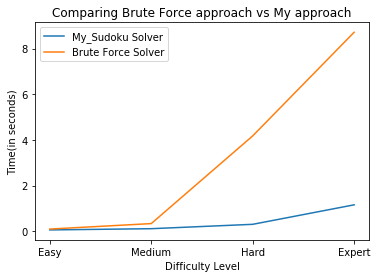

In [36]:
plt.plot(x_cod,my_time,label="My_Sudoku Solver")
plt.plot(x_cod,bf_time,label="Brute Force Solver")
plt.legend()
plt.xlabel('Difficulty Level')
plt.ylabel('Time(in seconds)')
plt.title('Comparing Brute Force approach vs My approach' )

In [37]:
# no of clues vs time

# requires lot of input data
